# Multiple Linear Regression

problem statement :

we have an airfoil data set where target value is pressure 
we have to predict the pressure output with the help of five feature values

#### importing necessary libraries

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing pandas 
import pandas as pd
import seaborn as sea
#importing numpy
import numpy as np
#importing math module
import math
# loading csv data from the file given in the url
column_names = ['Frequency','Angle','Chord_Length','Stream_Velocity','Thickness','Pressure']
data_set = pd.read_table("airfoil_self_noise.dat",names=column_names)
#printing top 5 values of data
data_set.head()

,Frequency,Angle,Chord_Length,Stream_Velocity,Thickness,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


#### data pre-processing 

In [2]:
#printing info about data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency          1503 non-null int64
Angle              1503 non-null float64
Chord_Length       1503 non-null float64
Stream_Velocity    1503 non-null float64
Thickness          1503 non-null float64
Pressure           1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [3]:
#checking for null values
data_set.isnull().sum()

Frequency          0
Angle              0
Chord_Length       0
Stream_Velocity    0
Thickness          0
Pressure           0
dtype: int64

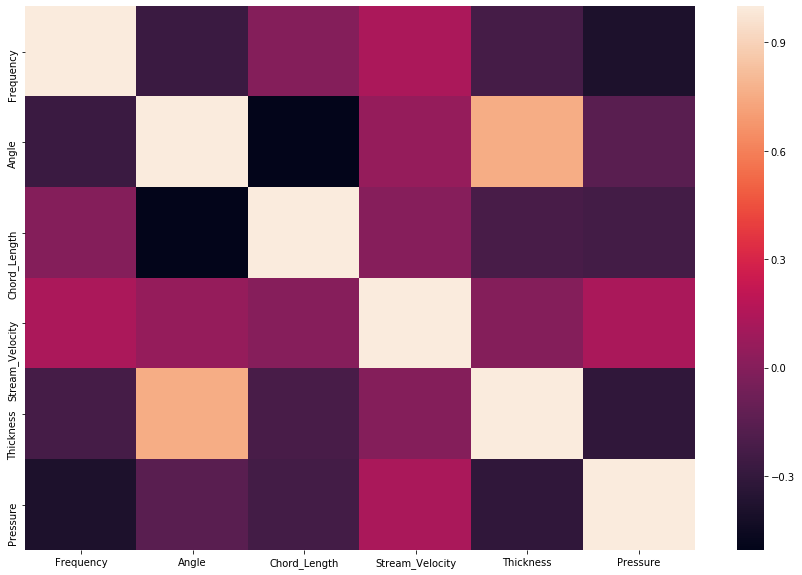

In [4]:
#plotting corelation map of data set for better view
plt.figure(figsize=(15,10))
sea.heatmap(data_set.corr())

In [5]:
#as we can see through co relation map 
#Stream velocity column in not corelated with pressure 
#dropping stream velocity column
data_set = data_set.drop(["Stream_Velocity"],axis = 1)

In [6]:
#checking variations or description of data set
data_set.describe()

,Frequency,Angle,Chord_Length,Thickness,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,0.011140,124.835943
std,3152.573137,5.918128,0.093541,0.013150,6.898657
min,200.000000,0.000000,0.025400,0.000401,103.380000
25%,800.000000,2.000000,0.050800,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,0.015576,129.995500
max,20000.000000,22.200000,0.304800,0.058411,140.987000


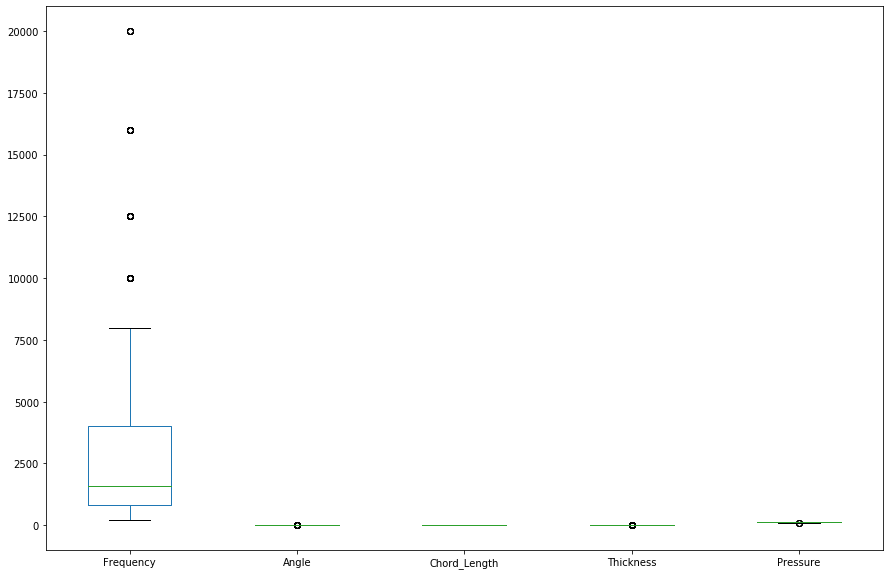

In [7]:
#checking outliers in each column
data_set.plot(kind='box',figsize=(15,10))              # observing outliers of each column  

In [8]:
#changing outliers values in frequency column with mean of frequencyabs
data_set.Frequency.loc[(data_set['Frequency'] > 7500)] = data_set['Frequency'].mean()

/home/admin3/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


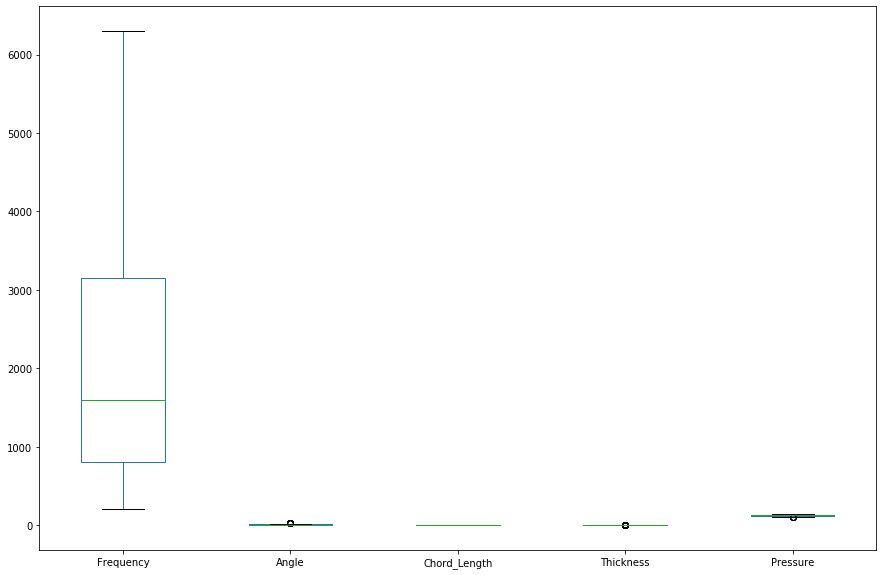

In [9]:
#checking outliers in each column
data_set.plot(kind='box',figsize=(15,10))              # observing outliers of each column  

In [10]:
#checking all the column names 
data_set.columns

Index(['Frequency', 'Angle', 'Chord_Length', 'Thickness', 'Pressure'], dtype='object')

In [11]:
#performing scaling on data\
#except target 
column_names=['Frequency', 'Angle', 'Chord_Length', 'Thickness']
for col in column_names:
    maximum = data_set[col].max()
    minimum = data_set[col].min()
    mean    = data_set[col].mean()
    for index in range(len(data_set[col])):
        data_set[col][index]=(data_set[col][index]-mean)  /  (maximum-minimum)
        

In [12]:
#displaying top 5 values of dataset
data_set.head()

,Frequency,Angle,Chord_Length,Thickness,Pressure
0,-0.224431,-0.305509,0.60219,-0.14612,126.201
1,-0.191644,-0.305509,0.60219,-0.14612,125.201
2,-0.150660,-0.305509,0.60219,-0.14612,125.951
3,-0.093283,-0.305509,0.60219,-0.14612,127.591
4,-0.027710,-0.305509,0.60219,-0.14612,127.461


#### Splitting train and test data set 

In [13]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train = data_set.sample(frac=0.7, random_state=3)   # selecting random 0.7 fraction of dataset as train set   
# chossing different random state will give different random rows
test = data_set.drop(train.index)            # selecting remaining i.e. 30% as test set
#printing shape of train set
print('Train set')
print(train.shape)
#seeing top 5 values of train set
train.head()

Train set
(1052, 5)


,Frequency,Angle,Chord_Length,Thickness,Pressure
851,-0.027710,0.198995,-0.306901,0.050545,133.311
816,0.160815,0.072869,-0.306901,-0.098109,128.402
919,-0.314595,0.388185,-0.306901,0.307623,121.225
1042,0.117599,-0.089293,-0.397810,-0.176388,131.346
581,0.677208,-0.062266,0.056735,-0.108421,116.677


In [14]:
#printing shape and top 5 values of test data set
print('Test set')
print(test.shape)
test.head()

Test set
(451, 5)


,Frequency,Angle,Chord_Length,Thickness,Pressure
2,-0.150660,-0.305509,0.60219,-0.14612,125.951
9,0.677208,-0.305509,0.60219,-0.14612,119.541
11,0.117599,-0.305509,0.60219,-0.14612,115.391
12,0.117599,-0.305509,0.60219,-0.14612,112.241
13,0.117599,-0.305509,0.60219,-0.14612,108.721


In [15]:
total= len(train)                # total records in train set
# creating matrix of independent variables
#creating numpy array to make calculations faster
x_values = np.ones(total)
x_values = np.append(x_values, train['Frequency'])
x_values = np.append(x_values, train['Angle'])
x_values = np.append(x_values, train['Chord_Length'])
x_values = np.append(x_values, train['Thickness'])
x_values = x_values.reshape(5, total)
#train y value
y_values = np.array(train['Pressure'])

In [16]:
total_test= len(test)                # total records in train set
# creating matrix of independent variables
#creating numpy array to make calculations faster
x_values_test = np.ones(total_test)
x_values_test = np.append(x_values_test, test['Frequency'])
x_values_test = np.append(x_values_test, test['Angle'])
x_values_test = np.append(x_values_test, test['Chord_Length'])
x_values_test = np.append(x_values_test, test['Thickness'])
x_values_test = x_values_test.reshape(5, total_test)
#train y value
y_values_test = np.array(test['Pressure'])

#### making linear regression model

In [17]:
#defining a function for obtaining cost function
def cost_function(variation):
    return sum((x_values).dot(variation**2))

In [18]:
# defining a function to obtain derivative of cost function
def derivative_cost_function(variation,row):
    m=1052
    return ( variation.dot(x_values[row]))  /m

In [19]:
# determining a function to obtain theta
def obtain_parameters():
    #initializing theta values to zero
    theta = np.array([0.0,0.0,0.0,0.0,0.0])
    alpha =0.01
    iterations = 10000
    cost=[]
    for _ in range(iterations):
        pred_y    = theta.dot(x_values)
        variation = pred_y - y_values
        cost.append(cost_function(variation))
        theta_copy = theta
        for row in range(0,len(theta)):
            theta_copy[row]      = theta_copy[row] - (alpha *  ( derivative_cost_function(variation,row) ) )
        theta = theta_copy
    return theta,cost,iterations

In [20]:
#obtaining theta values
theta = obtain_parameters()

In [21]:
#diaplaying theta
theta[0]

array([125.02566633, -11.40863947,  -5.50892634,  -8.88424554,
        -9.75101164])

In [22]:
# calcualting accuracy using absolute error method
total_error = abs(theta[0].dot(x_values_test) - y_values_test)/y_values_test
#checking accuracy using accuracy formula
accuracy = (1- total_error.sum()/len(test))

In [23]:
#printing percentage accuracabsy
accuracy*100

96.47479815192617

In [24]:
x = [val for val in range(theta[2])]

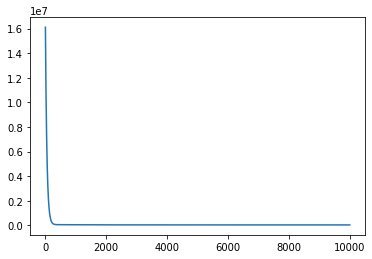

In [25]:
#plotting graph of cost function graph
plt.plot(x,theta[1])